## Data Load

In [113]:
import pandas as pd

In [114]:
df = pd.read_csv('train.csv')
df

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9319,boostcamp-sts-v1-train-9319,petition-sampled,교원능력개발평가에서 교원이 보호받을 수 있는 장치를 마련해야합니다,본인이 납부한 국민연금 금액을 기준으로 대출을 받을 수 있는 제도를 마련해 주세요,0.2,0.0
9320,boostcamp-sts-v1-train-9320,petition-sampled,여성가족부의 폐지를 원합니드,여성가족부 폐지를 청원 합니다.,4.2,1.0
9321,boostcamp-sts-v1-train-9321,petition-sampled,국회의원들 월급좀 줄여주세요,공무원 봉급좀 줄이지좀 마세요,0.6,0.0
9322,boostcamp-sts-v1-train-9322,slack-sampled,오늘 못한 점심은 다음에 다시 츄라이 하기로 해요!!,오늘 못먹은 밥은 꼭 담에 먹기로 하고요!!,3.2,1.0


### Label이 0.0인 데이터 확인

In [115]:
df_0 = df[df['label'] == 0.0]
print(len(df_0))
print(df_0.head())

2119
                            id            source  \
4   boostcamp-sts-v1-train-004     slack-sampled   
14  boostcamp-sts-v1-train-014     slack-sampled   
19  boostcamp-sts-v1-train-019  petition-sampled   
20  boostcamp-sts-v1-train-020     slack-sampled   
22  boostcamp-sts-v1-train-022     slack-sampled   

                         sentence_1                        sentence_2  label  \
4                        뿌듯뿌듯 하네요!!             꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!    0.0   
14  아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.  여러분들간의 다양한 아이디어를 제안하고 나누는 채널입니다.    0.0   
19           내년 러시아월드컵 자진포기 청원드립니다.       2023 아시안컵 유치에 공동개최를 반대 합니다.    0.0   
20                 앞머리 새로 하셨습니다. ^^          가방에 넣어 다니면서 조금씩 먹습니다. ^^    0.0   
22           답답할 때 보면 속이 뻥 뚫릴 것 같아요      양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ    0.0   

    binary-label  
4            0.0  
14           0.0  
19           0.0  
20           0.0  
22           0.0  


## Down sampling - 1000 data

### token 수가 3개 이상인 문장 선별
뽑은 문장을 augmentation하려면 의미가 어느정도 있는 문장(tokens_len>=3)이어야 한다고 판단

In [116]:
df_filtered = df_0[
    (df_0['sentence_1'].apply(lambda x: len(x.split())) >= 3) & 
    (df_0['sentence_2'].apply(lambda x: len(x.split())) >= 3)
]

print(len(df_filtered))
print(df_filtered.head())

1696
                            id            source  \
14  boostcamp-sts-v1-train-014     slack-sampled   
19  boostcamp-sts-v1-train-019  petition-sampled   
20  boostcamp-sts-v1-train-020     slack-sampled   
22  boostcamp-sts-v1-train-022     slack-sampled   
23  boostcamp-sts-v1-train-023      nsmc-sampled   

                              sentence_1                        sentence_2  \
14       아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.  여러분들간의 다양한 아이디어를 제안하고 나누는 채널입니다.   
19                내년 러시아월드컵 자진포기 청원드립니다.       2023 아시안컵 유치에 공동개최를 반대 합니다.   
20                      앞머리 새로 하셨습니다. ^^          가방에 넣어 다니면서 조금씩 먹습니다. ^^   
22                답답할 때 보면 속이 뻥 뚫릴 것 같아요      양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ   
23  노래와 잘 어우러지는 영상 덕분인지 짧지만 강한 인상이 남네요..           조금유치하지만 가볍게 볼수는 있는영화네요!   

    label  binary-label  
14    0.0           0.0  
19    0.0           0.0  
20    0.0           0.0  
22    0.0           0.0  
23    0.0           0.0  


### Data Filtering
1. filtered 문장 전체 augmentation 진행 (filtered: label이 0.0이면서 tokens_len>=3)
2. 문장 변화 없는 데이터셋 제외할 것

- filtered 문장 전체 augmentation 진행

In [117]:
from BERT_augmentation import BERT_Augmentation

BERT_aug = BERT_Augmentation()
random_masking_insertion = BERT_aug.random_masking_insertion

/Users/suvin/.pyenv/versions/3.12.4/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [118]:
df_filtered['sentence_1_bert'] = df_filtered['sentence_1'].apply(lambda x: random_masking_insertion(x))
df_filtered['sentence_2_bert'] = df_filtered['sentence_2'].apply(lambda x: random_masking_insertion(x))
print(df_filtered.head())

/var/folders/ln/gwgfj86n79l8sgq9_b4m1fpc0000gn/T/ipykernel_2887/2557564840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentence_1_bert'] = df_filtered['sentence_1'].apply(lambda x: random_masking_insertion(x))


                            id            source  \
14  boostcamp-sts-v1-train-014     slack-sampled   
19  boostcamp-sts-v1-train-019  petition-sampled   
20  boostcamp-sts-v1-train-020     slack-sampled   
22  boostcamp-sts-v1-train-022     slack-sampled   
23  boostcamp-sts-v1-train-023      nsmc-sampled   

                              sentence_1                        sentence_2  \
14       아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.  여러분들간의 다양한 아이디어를 제안하고 나누는 채널입니다.   
19                내년 러시아월드컵 자진포기 청원드립니다.       2023 아시안컵 유치에 공동개최를 반대 합니다.   
20                      앞머리 새로 하셨습니다. ^^          가방에 넣어 다니면서 조금씩 먹습니다. ^^   
22                답답할 때 보면 속이 뻥 뚫릴 것 같아요      양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ   
23  노래와 잘 어우러지는 영상 덕분인지 짧지만 강한 인상이 남네요..           조금유치하지만 가볍게 볼수는 있는영화네요!   

    label  binary-label                         sentence_1_bert  \
14    0.0           0.0      아래는 모두 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.   
19    0.0           0.0                - 내년 러시아월드컵 자진포기 청원드립니다.   
20    0.0        

/var/folders/ln/gwgfj86n79l8sgq9_b4m1fpc0000gn/T/ipykernel_2887/2557564840.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['sentence_2_bert'] = df_filtered['sentence_2'].apply(lambda x: random_masking_insertion(x))


- 문장 변화 없는 데이터셋 제외

In [119]:
group_1 = df_filtered[df_filtered['sentence_1'] != df_filtered['sentence_1_bert']]
group_1 = group_1[['sentence_1', 'sentence_1_bert']]
group_1 = pd.DataFrame(group_1)
group_1.to_csv('group_1.csv') # index=False
group_1

,sentence_1,sentence_1_bert
14,아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.,아래는 모두 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.
19,내년 러시아월드컵 자진포기 청원드립니다.,- 내년 러시아월드컵 자진포기 청원드립니다.
20,앞머리 새로 하셨습니다. ^^,앞머리 새로 발견 하셨습니다. ^ ^
22,답답할 때 보면 속이 뻥 뚫릴 것 같아요,답답할 때 보면 정말 속이 뻥 뚫릴 것 같아요
23,노래와 잘 어우러지는 영상 덕분인지 짧지만 강한 인상이 남네요..,노래와 잘 어우러지는 이 영상 덕분인지 짧지만 강한 인상이 남네요..
...,...,...
9229,사위가 장모한테 반말을 예의도없고 배운것도 없나요?,사위가 장모한테 반말을 예의도없고 배운것도 별로 없나요?
9237,다음에는 하와이서 보는걸로? ㅋㅋ,그럼 다음에는 하와이서 보는걸로? ㅋㅋ
9250,형광도료를 써서 안전하게 잘 보일 수 있도록 도와주세요.,형광도료를 써서 더 안전하게 잘 보일 수 있도록 도와주세요.
9266,국민연금 .. 어려운이들에게는 희망이될수있게 자율해지를..,국민연금.. 어려운이들에게는. 희망이될수있게 자율해지를..


In [120]:
group_2 = df_filtered[df_filtered['sentence_2'] != df_filtered['sentence_2_bert']]
group_2 = group_2[['sentence_2', 'sentence_2_bert']]
group_2 = pd.DataFrame(group_2)
group_2.to_csv('group_2.csv') # index=False
group_2

,sentence_2,sentence_2_bert
14,여러분들간의 다양한 아이디어를 제안하고 나누는 채널입니다.,여러분들간의 다양한 아이디어를 제안하고 함께 나누는 채널입니다.
19,2023 아시안컵 유치에 공동개최를 반대 합니다.,2023 아시안컵 유치에 공동개최를 강력히 반대 합니다.
20,가방에 넣어 다니면서 조금씩 먹습니다. ^^,가방에 넣어 다니면서 이것저것 조금씩 먹습니다. ^ ^
22,양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ,양보단 한입 먹는 순간 고삐가 풀릴 것 같아요 ㅋㅋㅋ
23,조금유치하지만 가볍게 볼수는 있는영화네요!,조금유치하지만 가볍게도 볼수는 있는영화네요!
...,...,...
9254,나라가 망해가고있는걸 젊은 24살 청년 또한 느끼고있는건.....,점점 나라가 망해가고있는걸 젊은 24살 청년 또한 느끼고있는건.....
9262,국민을 살릴려면 관광산업을 키워주세요.,국민을 살릴려면 관광산업을 더 키워주세요.
9266,"병원비 이천만원, 남은건 집 뿐인데 팔릴수 있게 도와주세요","병원비 이천만원, 남은건 집값 뿐인데 팔릴수 있게 도와주세요"
9274,대만박스오피스 1위 대만 클라스 보소 -_-;;,"대만박스오피스 1위, 대만 클라스 보소 - _ - ; ;"


- sentence_1과 sentence_2 모두 변형된 index만 고려

In [121]:
common_index = group_1.index.intersection(group_2.index)
group_1_common = group_1.loc[common_index]
group_2_common = group_2.loc[common_index]

In [123]:
group_1_common = pd.DataFrame(group_1_common)
#group_1_common.to_csv('group_1_common.csv') # index=False
group_1_common

,sentence_1,sentence_1_bert
14,아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.,아래는 모두 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.
19,내년 러시아월드컵 자진포기 청원드립니다.,- 내년 러시아월드컵 자진포기 청원드립니다.
20,앞머리 새로 하셨습니다. ^^,앞머리 새로 발견 하셨습니다. ^ ^
22,답답할 때 보면 속이 뻥 뚫릴 것 같아요,답답할 때 보면 정말 속이 뻥 뚫릴 것 같아요
23,노래와 잘 어우러지는 영상 덕분인지 짧지만 강한 인상이 남네요..,노래와 잘 어우러지는 이 영상 덕분인지 짧지만 강한 인상이 남네요..
...,...,...
9229,사위가 장모한테 반말을 예의도없고 배운것도 없나요?,사위가 장모한테 반말을 예의도없고 배운것도 별로 없나요?
9237,다음에는 하와이서 보는걸로? ㅋㅋ,그럼 다음에는 하와이서 보는걸로? ㅋㅋ
9250,형광도료를 써서 안전하게 잘 보일 수 있도록 도와주세요.,형광도료를 써서 더 안전하게 잘 보일 수 있도록 도와주세요.
9266,국민연금 .. 어려운이들에게는 희망이될수있게 자율해지를..,국민연금.. 어려운이들에게는. 희망이될수있게 자율해지를..


In [124]:
group_2_common

,sentence_2,sentence_2_bert
14,여러분들간의 다양한 아이디어를 제안하고 나누는 채널입니다.,여러분들간의 다양한 아이디어를 제안하고 함께 나누는 채널입니다.
19,2023 아시안컵 유치에 공동개최를 반대 합니다.,2023 아시안컵 유치에 공동개최를 강력히 반대 합니다.
20,가방에 넣어 다니면서 조금씩 먹습니다. ^^,가방에 넣어 다니면서 이것저것 조금씩 먹습니다. ^ ^
22,양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ,양보단 한입 먹는 순간 고삐가 풀릴 것 같아요 ㅋㅋㅋ
23,조금유치하지만 가볍게 볼수는 있는영화네요!,조금유치하지만 가볍게도 볼수는 있는영화네요!
...,...,...
9229,과연 귀신영화는 미국인한테 어울릴까요?,과연 이 귀신영화는 미국인한테 어울릴까요?
9237,ㅋㅋ 제가 멀리 나온걸로!,ㅋㅋ 제가 저 멀리 나온걸로!
9250,우리 각자의 인권을 찾을 수 있도록 참여해주세요,우리 각자의 인권을 찾을 수 있도록 적극 참여해주세요
9266,"병원비 이천만원, 남은건 집 뿐인데 팔릴수 있게 도와주세요","병원비 이천만원, 남은건 집값 뿐인데 팔릴수 있게 도와주세요"


In [59]:
'''group_1_common = group_1_common.rename(columns={
    'sentence_1': 'sentence',
    'sentence_1_bert': 'sentence_bert'
})
group_2_common = group_2_common.rename(columns={
    'sentence_2': 'sentence',
    'sentence_2_bert': 'sentence_bert'
})

group = pd.concat([group_1_common, group_2_common])  # ignore_index=True
group = pd.DataFrame(group)
group.to_csv('group.csv')  # index=False
group'''

,sentence,sentence_bert
14,아래는 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.,아래는 모두 게임 내에서 함께 팀을 맺고 캡쳐한 이미지입니다.
19,내년 러시아월드컵 자진포기 청원드립니다.,- 내년 러시아월드컵 자진포기 청원드립니다.
20,앞머리 새로 하셨습니다. ^^,앞머리 새로 발견 하셨습니다. ^ ^
22,답답할 때 보면 속이 뻥 뚫릴 것 같아요,답답할 때 보면 정말 속이 뻥 뚫릴 것 같아요
23,노래와 잘 어우러지는 영상 덕분인지 짧지만 강한 인상이 남네요..,노래와 잘 어우러지는 이 영상 덕분인지 짧지만 강한 인상이 남네요..
...,...,...
9229,과연 귀신영화는 미국인한테 어울릴까요?,과연 이 귀신영화는 미국인한테 어울릴까요?
9237,ㅋㅋ 제가 멀리 나온걸로!,ㅋㅋ 제가 저 멀리 나온걸로!
9250,우리 각자의 인권을 찾을 수 있도록 참여해주세요,우리 각자의 인권을 찾을 수 있도록 적극 참여해주세요
9266,"병원비 이천만원, 남은건 집 뿐인데 팔릴수 있게 도와주세요","병원비 이천만원, 남은건 집값 뿐인데 팔릴수 있게 도와주세요"


### sentence_1을 기준으로 유사도가 높은 상위 1000개 문장 선별
1. 코사인 유사도 계산 함수 정의
2. sentence와 sentence_bert 열 간의 코사인 유사도가 높은 상위 1000개의 행을 추출

- cosine similarity 계산 함수 정의

In [125]:
# Load model directly
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("jhgan/ko-sbert-nli")
model = AutoModel.from_pretrained("jhgan/ko-sbert-nli")

/Users/suvin/.pyenv/versions/3.12.4/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [126]:
import torch

def get_emb(sentences):
#Mean Pooling - Take attention mask into account for correct averaging
  def mean_pooling(model_output, attention_mask):
      token_embeddings = model_output[0] #First element of model_output contains all token embeddings
      input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
      return torch.sum(token_embeddings * input_mask_expanded, 1) / torch.clamp(input_mask_expanded.sum(1), min=1e-9)

  # Load model from HuggingFace Hub
  tokenizer = AutoTokenizer.from_pretrained('jhgan/ko-sbert-nli')
  model = AutoModel.from_pretrained('jhgan/ko-sbert-nli')

  sen1 = []
  sen2 = []
  # Tokenize sentences
  for sentence in sentences:
    encoded_input = tokenizer(sentence, padding=True, truncation=True, return_tensors='pt')

    # Compute token embeddings
    with torch.no_grad():
        model_output = model(**encoded_input)

    # Perform pooling. In this case, mean pooling.
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
    sen1.append(sentence_embeddings[0])
    sen2.append(sentence_embeddings[1])
  return sen1, sen2

In [127]:
def cos_sim(sen1, sen2):
  ans = []
  for a, b in zip(sen1, sen2):
    ans.append((torch.dot(a, b) / (torch.norm(a)*torch.norm(b))).item())
  return ans

- group_1_common에서 sentence와 sentence_bert 열 간의 코사인 유사도가 높은 상위 1000개의 행을 추출

In [128]:
sentences = list(zip(group_1_common['sentence_1'], group_1_common['sentence_1_bert']))
sen1, sen2 = get_emb(sentences)
group_1_common['cos_sim'] = cos_sim(sen1, sen2)

/Users/suvin/.pyenv/versions/3.12.4/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [137]:
group_1_common = group_1_common.sort_values(by='cos_sim', ascending=False)
group_1_common

,sentence_1,sentence_1_bert,cos_sim
8279,가능함... 가능하겠지... 가능할거야... 바보가 아닌 이상.,가능함... 가능하겠지.... 가능할거야... 바보가 아닌 이상.,0.999396
4601,지지율이 40% 대라고 ?? 믿을수없다!!,지지율이 40 % 대라고??? 믿을수없다!!,0.998864
3605,청갤 실명제로 어그로끄는 종자들을 적폐로 규정해주시고 무분별한 비판을 허용해주세요,"청갤 실명제로 어그로끄는 종자들을 적폐로 규정해주시고, 무분별한 비판을 허용해주세요",0.998849
1642,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기 바랍니다.,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기를 바랍니다.,0.998761
1505,우리가 어떤 세상에 살고 있는지... 불편한 진실.,우리가 어떤 세상에 살고 있는지.... 불편한 진실.,0.998693
...,...,...,...
8086,70세 이상도 기초연금 주세요,70세 이상도 아닌 기초연금 주세요,0.796387
4057,작가는 가난을 먹고 살지 않습니다.,작가는 결코 가난을 먹고 살지 않습니다.,0.775431
466,애들은 용에 환장할 듯,애들은 사냥 용에 환장할 듯,0.765792
5638,저는 사실 우리 중에 제일 좋은 홈가드닝 환경 가지고 계시는 얘기가 제일 기대되는 ㅎㅎ,저는 사실 우리 중에 제일 안 좋은 그런 홈가드닝 환경 가지고 계시는 얘기가 제일 ...,0.753312


In [138]:
top_1000_1 = group_1_common.iloc[:1000]
top_1000_1

,sentence_1,sentence_1_bert,cos_sim
8279,가능함... 가능하겠지... 가능할거야... 바보가 아닌 이상.,가능함... 가능하겠지.... 가능할거야... 바보가 아닌 이상.,0.999396
4601,지지율이 40% 대라고 ?? 믿을수없다!!,지지율이 40 % 대라고??? 믿을수없다!!,0.998864
3605,청갤 실명제로 어그로끄는 종자들을 적폐로 규정해주시고 무분별한 비판을 허용해주세요,"청갤 실명제로 어그로끄는 종자들을 적폐로 규정해주시고, 무분별한 비판을 허용해주세요",0.998849
1642,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기 바랍니다.,수능연기를 하되 수능고사장으로 지정된 학교는 일주일 휴교령을 내려주시기를 바랍니다.,0.998761
1505,우리가 어떤 세상에 살고 있는지... 불편한 진실.,우리가 어떤 세상에 살고 있는지.... 불편한 진실.,0.998693
...,...,...,...
212,시대를 타지 않는 명작...셰익스피어 원작 그자체,시대를 타지 않는 한 명작... 셰익스피어 원작 그자체,0.960833
1517,공유가 필요하신 페이지 링크 공유주실 수 있을까요?,공유가 필요하신 페이지 링크 공유주실 알 수 있을까요?,0.960741
7036,진짜 빨리 써주셨네요 ㅎㅎ,진짜 너무 빨리 써주셨네요 ㅎㅎ,0.960638
2825,이정도면 잘 만들어진 속편,이정도면 잘 만들어진다 속편,0.960484


- group_2_common에서 group_1_common에 있는 인덱스만 남김

In [140]:
top_1000_2 = group_2_common[group_2_common.index.isin(top_1000_1.index)]
top_1000_2

,sentence_2,sentence_2_bert,cos_sim
19,2023 아시안컵 유치에 공동개최를 반대 합니다.,2023 아시안컵 유치에 공동개최를 강력히 반대 합니다.,0.958274
22,양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ,양보단 한입 먹는 순간 고삐가 풀릴 것 같아요 ㅋㅋㅋ,0.994250
23,조금유치하지만 가볍게 볼수는 있는영화네요!,조금유치하지만 가볍게도 볼수는 있는영화네요!,0.994296
46,저는 사과나 우유에 프로틴타서 먹어요 ㅎㅎ,저는 사과나 우유에만 프로틴타서 먹어요 ㅎㅎ,0.763682
54,여성가족부 폐지하고 그 예산을 좀 더 올바르게 사용했으면 좋겠습니다.,여성가족부 폐지하고 그 예산을 좀 더 올바르게 잘 사용했으면 좋겠습니다.,0.995133
...,...,...,...
9229,과연 귀신영화는 미국인한테 어울릴까요?,과연 이 귀신영화는 미국인한테 어울릴까요?,0.993239
9237,ㅋㅋ 제가 멀리 나온걸로!,ㅋㅋ 제가 저 멀리 나온걸로!,0.974724
9250,우리 각자의 인권을 찾을 수 있도록 참여해주세요,우리 각자의 인권을 찾을 수 있도록 적극 참여해주세요,0.980431
9266,"병원비 이천만원, 남은건 집 뿐인데 팔릴수 있게 도와주세요","병원비 이천만원, 남은건 집값 뿐인데 팔릴수 있게 도와주세요",0.905659


In [146]:
top_1000_2 = top_1000_2.sort_values(by='cos_sim', ascending=False).iloc[:977]
top_1000_2

,sentence_2,sentence_2_bert,cos_sim
4899,팔 언제 뺄 수 있나요 ㅋㅋ,팔 언제 뺄릴 수 있나요 ㅋㅋ,1.000000
3149,아 뻔한 스토리 ......ㅡ..ㅡ,아 뻔한 스토리....... ㅡ.. ㅡ,0.999486
2947,한국자산관리공사에 근무하는 사람들의 특권의식을 없애는 제도적 장치를 마련해주시기 바랍니다,한국자산관리공사에 근무하는 사람들의 특권의식을 없애는 제도적인 장치를 마련해주시기 ...,0.999481
2945,150만원 이하 통장압류 금지법 ... 빨리 만들어주세요 ...,150만원 이하 통장압류 금지법... 빨리 만들어주세요....,0.999343
1118,넘나 좋았던 제주도 비양도 캠핑... 크억.. 사진보니 너무 땡기네요ㅎㅎ,넘나 좋았던 제주도 비양도 캠핑... 크억... 사진보니 너무 땡기네요ㅎㅎ,0.999253
...,...,...,...
5452,개 이하가 없어서 정말 안타깝습니다.,개 이하가 거의 없어서 정말 안타깝습니다.,0.898096
4789,군병원 폐지하고 민간병원에 위탁합시다.,군병원 폐지하고 민간병원에만 위탁합시다.,0.897230
5744,오 신기 이런게 있군요,오 신기 이런게 다 있군요,0.897179
1965,그 모태가 되는게 언리더십이었군요!,그 모태가 하나 되는게 언리더십이었군요!,0.896549


In [62]:
top_1000_2 = pd.DataFrame(top_1000_2)
top_1000_2.to_csv('top_1000_2.csv')  # index=False
top_1000_2

,sentence_2,sentence_2_bert
14,여러분들간의 다양한 아이디어를 제안하고 나누는 채널입니다.,여러분들간의 다양한 아이디어를 제안하고 함께 나누는 채널입니다.
19,2023 아시안컵 유치에 공동개최를 반대 합니다.,2023 아시안컵 유치에 공동개최를 강력히 반대 합니다.
20,가방에 넣어 다니면서 조금씩 먹습니다. ^^,가방에 넣어 다니면서 이것저것 조금씩 먹습니다. ^ ^
22,양보단 한입 먹는 순간 고삐 풀릴 것 같아요 ㅋㅋㅋ,양보단 한입 먹는 순간 고삐가 풀릴 것 같아요 ㅋㅋㅋ
23,조금유치하지만 가볍게 볼수는 있는영화네요!,조금유치하지만 가볍게도 볼수는 있는영화네요!
...,...,...
9206,양구 군인 사건에 대해서 철저히 밝혀주세요,양구 군인 사건에 대해서 철저히 진실 밝혀주세요
9229,과연 귀신영화는 미국인한테 어울릴까요?,과연 이 귀신영화는 미국인한테 어울릴까요?
9237,ㅋㅋ 제가 멀리 나온걸로!,ㅋㅋ 제가 저 멀리 나온걸로!
9250,우리 각자의 인권을 찾을 수 있도록 참여해주세요,우리 각자의 인권을 찾을 수 있도록 적극 참여해주세요


### Down Sampling
위 1000개의 데이터셋에 해당하는 index는 0.0 label에서 cut

In [64]:
dataset = df[~df.index.isin(top_1000_1['index'])]
print(len(dataset))
print(dataset.head())

8324
                           id            source  \
0  boostcamp-sts-v1-train-000      nsmc-sampled   
1  boostcamp-sts-v1-train-001         slack-rtt   
2  boostcamp-sts-v1-train-002  petition-sampled   
3  boostcamp-sts-v1-train-003     slack-sampled   
4  boostcamp-sts-v1-train-004     slack-sampled   

                               sentence_1                    sentence_2  \
0  스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~          반전도 있고,사랑도 있고재미도있네요.   
1                    앗 제가 접근권한이 없다고 뜹니다;;           오, 액세스 권한이 없다고 합니다.   
2                          주택청약조건 변경해주세요.            주택청약 무주택기준 변경해주세요.   
3                  입사후 처음 대면으로 만나 반가웠습니다.  화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.   
4                              뿌듯뿌듯 하네요!!         꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!   

   label  binary-label  
0    2.2           0.0  
1    4.2           1.0  
2    2.4           0.0  
3    3.0           1.0  
4    0.0           0.0  


## Data Augmentation

### 데이터 할당
- label = 5.0에 같다시피한 데이터 286개 할당
- label = 4.8에 top_1000_1 데이터 500, top_1000_2 데이터 500까지 할당
- label = 4.6에 top_1000_1 데이터 650, top_1000_2 데이터 650까지 할당
- label = 4.5에 top_1000_1 데이터 850, top_1000_2 데이터 850까지 할당
- label = 4.4에 top_1000_1 데이터 925, top_1000_2 데이터 925까지 할당
- label = 4.2에 top_1000_1 데이터 999, top_1000_2 데이터 999까지 할당

### label = 5.0인 데이터셋 따로 고려
label이 5점인 데이터셋은 큰 차이가 없어야 한다고 판단

In [94]:
import re
import unicodedata

def preprocess_text(text):
    # 소문자로 변환
    text = text.lower()
    # 한글, 영어, 공백을 제외한 모든 문자 제거
    text = re.sub(r'[^가-힣a-zA-Z\s]', '', text)
    # 공백 제거
    text = ''.join(text.split())

    return text

def compare_sentences(sentence1, sentence2):
    preprocessed_sentence1 = preprocess_text(sentence1)
    preprocessed_sentence2 = preprocess_text(sentence2)
    
    return preprocessed_sentence1 == preprocessed_sentence2

# 예시
sentence1 = "잔잔한 감동으로 다가온 영화,"
sentence2 = "잔잔한 감동으로 다가온영화"

result = compare_sentences(sentence1, sentence2)
print(result)  # True 또는 False

True


In [102]:
top_1000_1['are_equal'] = top_1000_1.apply(lambda row: compare_sentences(row['sentence'], row['sentence_bert']), axis=1)
equal_1 = top_1000_1[top_1000_1['are_equal']]
equal_1

,index,sentence,sentence_bert,similarity,are_equal
1,5165,"서번째 보면서 눈물을 흘렸다,,",", 서번째 보면서 눈물을 흘렸다,,",1.000000,True
6,2083,"구적폐와 신적폐, 다 배척하여야할 대상, 보통 국민을 표준으로 하여주십시오","구적폐와, 신적폐, 다 배척하여야할 대상, 보통 국민을 표준으로 하여주십시오",1.000000,True
7,753,노골적으로 하는 장면이 나오는데...,. 노골적으로 하는 장면이 나오는데...,1.000000,True
8,2397,제건 7명 이상 무리데스네요 ㅋ.ㅋ ㅋㅋ,제건 7명 이상 무리데스네요. ㅋ. ㅋ ㅋㅋ,1.000000,True
9,2934,음주운전도 중요하지만 졸음운전 노약자나 심신미약자 운전미숙도 좀 중요시합시다.,"음주운전도 중요하지만, 졸음운전 노약자나 심신미약자 운전미숙도 좀 중요시합시다.",1.000000,True
...,...,...,...,...,...
353,5468,오 저도 버터플라이 한단 모셔왔는데! ㅎㅎ,ㅎㅎ 오 저도 버터플라이 한단 모셔왔는데! ㅎㅎ,0.967151,True
375,5677,헤헷 자꾸 동여매서 결국 똑같아지는 중이예용ㅋㅋ,헤헷 자꾸 동여매서 ㅋㅋㅋ 결국 똑같아지는 중이예용ㅋㅋ,0.962855,True
376,8632,저도 선드립 후검색...! ㅋㅋ,ㅋㅋ 저도 선드립 후검색...! ㅋㅋ,0.962808,True
501,55,근데 멜로연기는 영 ㅋㅋㅋ,ㅋㅋㅋ 근데 멜로연기는 영 ㅋㅋㅋ,0.946563,True


In [110]:
top_1000_2['are_equal'] = top_1000_2.apply(lambda row: compare_sentences(row['sentence'], row['sentence_bert']), axis=1)
equal_2 = top_1000_2[top_1000_2['are_equal']]
equal_2

,index,sentence,sentence_bert,cosine_similarity,are_equal
10,663,"무분별한 창업사업화자금 선정철저, 미흡시 환수 철저히(기술혁신형 창업기업 사업을 중...","무분별한 창업사업화자금, 선정철저, 미흡시 환수 철저히 ( 기술혁신형 창업기업 사업...",1.000000,True
12,5995,공포를 원한다면 밤에 거울 앞에서 후래시 번 깜빡여봐라...,. 공포를 원한다면 밤에 거울 앞에서 후래시 번 깜빡여봐라...,1.000000,True
13,3101,서명을 보니 또 1번이 좋아보여요...!!,"서명을 보니, 또 1번이 좋아보여요...!!",1.000000,True
14,5519,오 뭔가 점점 아빠를 닮아가네요..!,! 오 뭔가 점점 아빠를 닮아가네요..!,1.000000,True
20,2840,"ㅡ,.ㅡ"" 보다가 확 닫은영화.","ㅡ,. ㅡ "" 보다가 "" 확 닫은영화.",1.000000,True
...,...,...,...,...,...
380,7321,MBTI는 정 반대였습니다. ㅋㅋㅋ,MBTI는 정 반대였습니다.. ㅋㅋㅋ,1.000000,True
386,76,투혼과 함께 반담의 최고영화. 복수의 칼날 반담~,투혼과 함께 반담의 최고영화. > 복수의 칼날 반담 ~,1.000000,True
415,2397,제꺼 헤드셋 정보 입니다. ㅋㅋㅋ,ㅋㅋㅋ 제꺼 헤드셋 정보 입니다. ㅋㅋㅋ,0.965204,True
439,5449,ㅋㅋㅋ 진짜 시간 가는 줄 몰랐네요,ㅋㅋㅋ ㅋㅋㅋ 진짜 시간 가는 줄 몰랐네요,0.960667,True


In [99]:
equal = pd.concat([equal_1, equal_2], ignore_index=True)
equal = pd.DataFrame(equal)
equal.to_csv('equal.csv')  # index=False
equal

,index,sentence,sentence_bert,similarity,are_equal,cosine_similarity
0,5165,"서번째 보면서 눈물을 흘렸다,,",", 서번째 보면서 눈물을 흘렸다,,",1.0,True,NaN
1,2083,"구적폐와 신적폐, 다 배척하여야할 대상, 보통 국민을 표준으로 하여주십시오","구적폐와, 신적폐, 다 배척하여야할 대상, 보통 국민을 표준으로 하여주십시오",1.0,True,NaN
2,753,노골적으로 하는 장면이 나오는데...,. 노골적으로 하는 장면이 나오는데...,1.0,True,NaN
3,2397,제건 7명 이상 무리데스네요 ㅋ.ㅋ ㅋㅋ,제건 7명 이상 무리데스네요. ㅋ. ㅋ ㅋㅋ,1.0,True,NaN
4,2934,음주운전도 중요하지만 졸음운전 노약자나 심신미약자 운전미숙도 좀 중요시합시다.,"음주운전도 중요하지만, 졸음운전 노약자나 심신미약자 운전미숙도 좀 중요시합시다.",1.0,True,NaN
...,...,...,...,...,...,...
281,7321,MBTI는 정 반대였습니다. ㅋㅋㅋ,MBTI는 정 반대였습니다.. ㅋㅋㅋ,NaN,True,1.000000
282,76,투혼과 함께 반담의 최고영화. 복수의 칼날 반담~,투혼과 함께 반담의 최고영화. > 복수의 칼날 반담 ~,NaN,True,1.000000
283,2397,제꺼 헤드셋 정보 입니다. ㅋㅋㅋ,ㅋㅋㅋ 제꺼 헤드셋 정보 입니다. ㅋㅋㅋ,NaN,True,0.965204
284,5449,ㅋㅋㅋ 진짜 시간 가는 줄 몰랐네요,ㅋㅋㅋ ㅋㅋㅋ 진짜 시간 가는 줄 몰랐네요,NaN,True,0.960667


In [109]:
equal_1 = top_1000_1[top_1000_1['are_equal']]
equal_1_filtered = top_1000_1[~top_1000_1['index'].isin(equal_1['index'])]
equal_1_filtered

,index,sentence,sentence_bert,similarity,are_equal
0,4852,"코로나에 대한 이야기도 하고, 제가 런닝을 ~하다말다~ 하고 있어서 런닝에 대한 조...","코로나에 대한 이야기도 하고, 또 제가 런닝을 ~ 하다말다 ~ 하고 있어서, 런닝에...",1.000000,False
2,8726,오 그럼 잠드시기 전에 알려주세요! ㅋㅋ,오 그럼 잠드시기 전에 꼭 알려주세요! ㅋㅋ,1.000000,False
3,7793,한 번 문의 드려 볼게요~~,한 번 문의 드려 봐 볼게요 ~ ~,1.000000,False
4,8465,국가토지 임대후 그 토지를 전대하여 이득을 취하는자 엄벌,국가토지 임대후 그 토지를 전대하여 그 이득을 취하는자 엄벌,1.000000,False
5,7551,삶이 무료할 땐 휴가를!!!!,내 삶이 무료할 땐 휴가를!!!!,1.000000,False
...,...,...,...,...,...
995,3381,(주)아주의대벤처메딕스 ASF닥터에스리 화장품 업체 갑질 고발합니다,( 주 ) 아주의대벤처메딕스 ASF닥터에스리 화장품 업체에 갑질 고발합니다,0.835921,False
996,2897,양봉 하시는 분 때문에 이제 정신적 고통까지 받고있습니다.,양봉을 하시는 분 때문에 이제 정신적 고통까지 받고있습니다.,0.835288,False
997,3122,무술 꼭 배워보고 싶었는데 시간이 안맞아서 너무 아쉬웠습니다.,무술 꼭 배워보고는 싶었는데 시간이 안맞아서 너무 아쉬웠습니다.,0.834270,False
998,3668,정말재밌더라 시온주의의유태인들이 겨우나라얻었는데 상식적으로생각해보면 팔레스타인인들강...,정말재밌더라 시온주의의유태인들이야 겨우나라얻었는데 상식적으로생각해보면 팔레스타인인들...,0.833333,False


In [111]:
equal_2 = top_1000_2[top_1000_2['are_equal']]
equal_2_filtered = top_1000_2[~top_1000_2['index'].isin(equal_2['index'])]
equal_2_filtered

,index,sentence,sentence_bert,cosine_similarity,are_equal
0,2468,"이효리가 출산율 저하에 미친 영향을 고려하여, 영향력있는 인사의 방송 출연 적극 제...","가수 이효리가 출산율 저하에 미친 큰 영향을 고려하여, 영향력있는 인사의 방송 출연...",1.000000,False
1,8196,"아동, 청소년 대상 성범죄의 처벌과 절차에 관한 특례법 형량 기준을 높이는것에 청원...","아동, 청소년 대상 성범죄의 처벌과 절차에 이에에 관한 특례법 형량 기준을 높이는것...",1.000000,False
2,3210,이러한 차이를 두지 않는다면 검토 세션 중에 갈등이 초래될 수 있다.,만약에 이러한 차이를 두지 않는다면 검토 세션 중에 갈등이 초래될 수 있다.,1.000000,False
3,7873,번호판 판매의혹.. 과연 우연일까요?,번호판 불법 판매의혹.. 과연 우연일까요?,1.000000,False
4,116,그리고 그림 또한 그리는걸 좋아하셔서 타블렛까지 구매하셔서 종종 그리신다고 하십니다!,"그리고 그림 또한 그리는걸 좋아하셔서 타블렛까지 구매하셔서, 또 종종 그리신다고 하...",1.000000,False
...,...,...,...,...,...
995,8632,저는 진짜 넘 추천드립니당...ㅋㅋㅋ,저는 진짜로 넘 추천드립니당... ㅋㅋㅋ,0.718006,False
996,6943,그냥 아무생각 없이 보면 잼쎠요 ㅋㅋㅋ,그냥 아무생각 없이 보면서 ㅋㅋㅋ,0.701865,False
997,3480,말씀하신 부분 잘 이해했습니다,말씀하신 부분을 잘 이해했습니다,0.666667,False
998,4024,요롷게 요롷게 작게 잎이 나는!,작게 자란 잎이 나는!,0.639118,False


In [112]:
equal_filtered = pd.concat([equal_1_filtered, equal_2_filtered], ignore_index=True)
equal_filtered = pd.DataFrame(equal_filtered)
equal_filtered.to_csv('equal_filtered.csv')  # index=False
equal_filtered

,index,sentence,sentence_bert,similarity,are_equal,cosine_similarity
0,4852,"코로나에 대한 이야기도 하고, 제가 런닝을 ~하다말다~ 하고 있어서 런닝에 대한 조...","코로나에 대한 이야기도 하고, 또 제가 런닝을 ~ 하다말다 ~ 하고 있어서, 런닝에...",1.0,False,NaN
1,8726,오 그럼 잠드시기 전에 알려주세요! ㅋㅋ,오 그럼 잠드시기 전에 꼭 알려주세요! ㅋㅋ,1.0,False,NaN
2,7793,한 번 문의 드려 볼게요~~,한 번 문의 드려 봐 볼게요 ~ ~,1.0,False,NaN
3,8465,국가토지 임대후 그 토지를 전대하여 이득을 취하는자 엄벌,국가토지 임대후 그 토지를 전대하여 그 이득을 취하는자 엄벌,1.0,False,NaN
4,7551,삶이 무료할 땐 휴가를!!!!,내 삶이 무료할 땐 휴가를!!!!,1.0,False,NaN
...,...,...,...,...,...,...
1709,8632,저는 진짜 넘 추천드립니당...ㅋㅋㅋ,저는 진짜로 넘 추천드립니당... ㅋㅋㅋ,NaN,False,0.718006
1710,6943,그냥 아무생각 없이 보면 잼쎠요 ㅋㅋㅋ,그냥 아무생각 없이 보면서 ㅋㅋㅋ,NaN,False,0.701865
1711,3480,말씀하신 부분 잘 이해했습니다,말씀하신 부분을 잘 이해했습니다,NaN,False,0.666667
1712,4024,요롷게 요롷게 작게 잎이 나는!,작게 자란 잎이 나는!,NaN,False,0.639118


### 나머지 라벨 고려

label = 4.8

In [71]:
label_48_1 = equal_1_filtered[['sentence', 'sentence_bert']].iloc[325:500]
label_48_2 = equal_2_filtered[['sentence', 'sentence_bert']].iloc[325:500]
label_48 = pd.concat([label_48_1, label_48_2])
label_48['label'] = 4.8
label_48['binary-label'] = 1.0
label_48

,sentence,sentence_bert,label,binary-label
325,"세상에서 가장 사랑하는 사람들로부터 이해 받기 힘들었던, 위대한 사명감을 가진 사람...","세상에서 가장 사랑하는 사람들로부터 가장 이해 받기 힘들었던, 위대한 사명감을 다 ...",4.8,1.0
326,"ㅋㅋ ‘갑서‘, ‘가게마씸’ 뉘앙스 차이 검증 했습니다","ㅋㅋ ㅋㅋ ‘ 갑서 ‘, ‘ 가게마씸 ’ 뉘앙스 차이 검증 했습니다",4.8,1.0
327,"ㅎㅎㅎ 이거 30분 열심히 하시면 1천보, 조금 빨리가면 20분 천, 한시간 3천 ...","ㅎㅎㅎ 그리고 이거 30분 열심히 하시면 1천보, 조금 빨리가면 약 20분 천, 한...",4.8,1.0
328,바다가 너무 예쁘지만 사람은 별로 없어서 한적하다고 하시네요!!,바다가 너무 예쁘지만 사람은 별로 없어서 너무 한적하다고 하시네요!!,4.8,1.0
329,2018년 29회 공인중개사 시험 이의문제 제기. 지금 뿐만 아니라 앞으로를 위해 ...,2018년 29회 공인중개사 시험 이의문제 제기. 그리고 지금 뿐만 아니라 앞으로를...,4.8,1.0
...,...,...,...,...
495,직장내 상사의 갑질과 과도한 회식후 벌어지는 환락에 금지를 직장인들의 동참을 기다립니다,직장내 상사의 갑질과 과도한 회식후 벌어지는 환락에 금지를 위한 모든 직장인들의 동...,4.8,1.0
496,"주인공들 사이의 발전에 개연성도 떨어지고 화면, 내용이 여러 영화의 짜집기 같다.","주인공들 사이의 관계 발전에 개연성도 떨어지고 화면, 내용이 여러 영화의 마치 짜집...",4.8,1.0
497,여러가지 재밌는 취미를 가지는 것이 좋지 않을까 의견이 나왔습니다.,여러가지 재밌는 취미를 가지는 그런 것이 좋지 않을까 의견이 나왔습니다.,4.8,1.0
498,다양한 입력을 통해 다양한 출력이 나온다.,다양한 입력을 통해 다양한 출력이 함께 나온다.,4.8,1.0


In [72]:
label_48 = label_48.rename(columns={
    'sentence': 'sentence_1',
    'sentence_bert': 'sentence_2'
})
dataset = pd.concat([dataset, label_48], ignore_index=True)
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9319,NaN,NaN,직장내 상사의 갑질과 과도한 회식후 벌어지는 환락에 금지를 직장인들의 동참을 기다립니다,직장내 상사의 갑질과 과도한 회식후 벌어지는 환락에 금지를 위한 모든 직장인들의 동...,4.8,1.0
9320,NaN,NaN,"주인공들 사이의 발전에 개연성도 떨어지고 화면, 내용이 여러 영화의 짜집기 같다.","주인공들 사이의 관계 발전에 개연성도 떨어지고 화면, 내용이 여러 영화의 마치 짜집...",4.8,1.0
9321,NaN,NaN,여러가지 재밌는 취미를 가지는 것이 좋지 않을까 의견이 나왔습니다.,여러가지 재밌는 취미를 가지는 그런 것이 좋지 않을까 의견이 나왔습니다.,4.8,1.0
9322,NaN,NaN,다양한 입력을 통해 다양한 출력이 나온다.,다양한 입력을 통해 다양한 출력이 함께 나온다.,4.8,1.0


### label = 4.6

In [73]:
label_46_1 = equal_1_filtered[['sentence', 'sentence_bert']].iloc[500:650]
label_46_2 = top_1000_2[['sentence', 'sentence_bert']].iloc[500:650]
label_46 = pd.concat([label_46_1, label_46_2])
label_46['label'] = 4.6
label_46['binary-label'] = 1.0
label_46

,sentence,sentence_bert,label,binary-label
500,송중기 내레이션 이라고 보는 사람 진짜 짜증난다.,송중기 내레이션 이라고 해서 보는 사람 진짜 짜증난다.,4.6,1.0
501,근데 멜로연기는 영 ㅋㅋㅋ,ㅋㅋㅋ 근데 멜로연기는 영 ㅋㅋㅋ,4.6,1.0
502,힌국 건축에 대한 의식 개선에 대한 영화가 더 많아졌으면 좋겠습니다.,힌국 건축에 대한 시민 의식 개선에 대한 영화가 좀 더 많아졌으면 좋겠습니다.,4.6,1.0
503,세월호 특조위 2기가 필요합니다,그리고 세월호 특조위 2기가 필요합니다,4.6,1.0
504,다음에 태도가 작품이 될 때 리뷰도 올려주세요!,다음에 태도가 작품이 될 때 리뷰도 같이 올려주세요!,4.6,1.0
...,...,...,...,...
645,건강보험 보장 확대에 오타반점 제거 시술도 포함해 주세요.,건강보험료 보장 확대에 오타반점 제거 시술도 포함해 주세요.,4.6,1.0
646,10월 국정감사에 정몽규 대한축구협회 회장을 반드시 출석시켜 주십시오,10월 국정감사에서 정몽규 대한축구협회 회장을 반드시 출석시켜 주십시오,4.6,1.0
647,화려한 액션과 아버지와 아들의 감동적인 스토리...,화려한 액션과 아버지와 아들의 가장 감동적인 스토리...,4.6,1.0
648,이거 심하게 humor에 있어야 할 내용인데요?ㅋ,이거는 심하게 humor에 있어야 할 내용인데요? ㅋ,4.6,1.0


In [74]:
label_46 = label_46.rename(columns={
    'sentence': 'sentence_1',
    'sentence_bert': 'sentence_2'
})
dataset = pd.concat([dataset, label_46], ignore_index=True)
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
9619,NaN,NaN,건강보험 보장 확대에 오타반점 제거 시술도 포함해 주세요.,건강보험료 보장 확대에 오타반점 제거 시술도 포함해 주세요.,4.6,1.0
9620,NaN,NaN,10월 국정감사에 정몽규 대한축구협회 회장을 반드시 출석시켜 주십시오,10월 국정감사에서 정몽규 대한축구협회 회장을 반드시 출석시켜 주십시오,4.6,1.0
9621,NaN,NaN,화려한 액션과 아버지와 아들의 감동적인 스토리...,화려한 액션과 아버지와 아들의 가장 감동적인 스토리...,4.6,1.0
9622,NaN,NaN,이거 심하게 humor에 있어야 할 내용인데요?ㅋ,이거는 심하게 humor에 있어야 할 내용인데요? ㅋ,4.6,1.0


### label = 4.5

In [75]:
label_45_1 = equal_1_filtered[['sentence', 'sentence_bert']].iloc[650:850]
label_45_2 = top_1000_2[['sentence', 'sentence_bert']].iloc[650:850]
label_45 = pd.concat([label_45_1, label_45_2])
label_45['label'] = 4.5
label_45['binary-label'] = 1.0
label_45

,sentence,sentence_bert,label,binary-label
650,한국GM에 공적자금 (국밈혈세)지원을 반대합니다,또한 한국GM에 공적자금 ( 국밈혈세 ) 지원을 반대합니다,4.5,1.0
651,저 진짜 셔츠 구매하고 싶어요..!,저는 진짜 셔츠 구매하고 싶어요..!,4.5,1.0
652,모든 공동주택 관리비 통장 월 1회 공개의무화,서울시 모든 공동주택 관리비 통장 월 1회 공개의무화,4.5,1.0
653,"다음 미팅이 있어서 이야기 나누다가 허겁지겁 마무리 했는데, 담에 오피스에서 만나서...","다음 미팅이 있어서 이야기 나누다가 허겁지겁 대충 마무리 했는데, 담에 오피스에서 ...",4.5,1.0
654,왜 우리선수들은 태극기를 달면 안되나요?,그런데 왜 우리선수들은 태극기를 달면 안되나요?,4.5,1.0
...,...,...,...,...
845,네고왕이랑 콜라보해서 바프 아몬드 세일하네용,네고왕이랑 콜라보해서 바프 아몬드도 세일하네용,4.5,1.0
846,대박… 조만간 꼭 갑니다….ㅋㅋ,대박 … 조만간 꼭 한국 갑니다 …. ㅋㅋ,4.5,1.0
847,훅팀의 퍼포먼스도 한번 봐주세요..,훅팀의 멋진 퍼포먼스도 한번 봐주세요..,4.5,1.0
848,저 진짜 너무 먹고 싶어요,저 진짜 너무 먹고 보고 싶어요,4.5,1.0


In [76]:
label_45 = label_45.rename(columns={
    'sentence': 'sentence_1',
    'sentence_bert': 'sentence_2'
})
dataset = pd.concat([dataset, label_45], ignore_index=True)
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
10019,NaN,NaN,네고왕이랑 콜라보해서 바프 아몬드 세일하네용,네고왕이랑 콜라보해서 바프 아몬드도 세일하네용,4.5,1.0
10020,NaN,NaN,대박… 조만간 꼭 갑니다….ㅋㅋ,대박 … 조만간 꼭 한국 갑니다 …. ㅋㅋ,4.5,1.0
10021,NaN,NaN,훅팀의 퍼포먼스도 한번 봐주세요..,훅팀의 멋진 퍼포먼스도 한번 봐주세요..,4.5,1.0
10022,NaN,NaN,저 진짜 너무 먹고 싶어요,저 진짜 너무 먹고 보고 싶어요,4.5,1.0


### label = 4.4

In [79]:
label_44_1 = equal_1_filtered[['sentence', 'sentence_bert']].iloc[850:950]
label_44_2 = top_1000_2[['sentence', 'sentence_bert']].iloc[850:950]
label_44 = pd.concat([label_44_1, label_44_2])
label_44['label'] = 4.4
label_44['binary-label'] = 1.0
label_44

,sentence,sentence_bert,label,binary-label
850,논산 여교사 그루밍 성범죄의 A군의 친구 B군에 대한 진실을 요구합니다.,논산은 여교사 그루밍 성범죄의 A군의 친구 인 B군에 대한 진실을 요구합니다.,4.4,1.0
851,다주택자의 대출을 신속히 회수하라,다주택자의 고금리 대출을 신속히 회수하라,4.4,1.0
852,꽃향기를 맡으면 힘이 솓는 꼬마자동차..!!!,이 꽃향기를 맡으면 힘이 꼬마자동차..!!!,4.4,1.0
853,올해 안에 꼭 비행기 타러가요 ㅠ_ㅠ !!!!,올해 안에 꼭 비행기 타러가요? ㅠ _ ㅠ!!!!,4.4,1.0
854,"일정 이용자 이상 사용 토론 싸이트에서 본인인증을 하고, 이름을 1자리 빼고 공개하...","일정 이용자 이상은 사용 토론 싸이트에서 본인인증을 하고, 사용자 이름을 1자리 빼...",4.4,1.0
...,...,...,...,...
945,"네네. 저도 처음에는 뭔가 괴상한 한글 같아서 거부감이 있었는데, 그것도 쓰다보니 ...","네네. 저도 처음에는 뭔가 괴상한 한글 같아서 거부감이 있었는데, 막상 그것도 막상...",4.4,1.0
946,찾고 있는데 쉽지 않네요,찾고는 있는데 쉽지 않네요,4.4,1.0
947,드라마 집중안되어 채널을 돌리기도합니다..,드라마 집중안되어서 채널을 돌리기도합니다..,4.4,1.0
948,@오피스에 출근 자주하시는 분들,@ 오피스에 출근을 자주하시는 분들,4.4,1.0


In [80]:
label_44 = label_44.rename(columns={
    'sentence': 'sentence_1',
    'sentence_bert': 'sentence_2'
})
dataset = pd.concat([dataset, label_44], ignore_index=True)
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
10219,NaN,NaN,"네네. 저도 처음에는 뭔가 괴상한 한글 같아서 거부감이 있었는데, 그것도 쓰다보니 ...","네네. 저도 처음에는 뭔가 괴상한 한글 같아서 거부감이 있었는데, 막상 그것도 막상...",4.4,1.0
10220,NaN,NaN,찾고 있는데 쉽지 않네요,찾고는 있는데 쉽지 않네요,4.4,1.0
10221,NaN,NaN,드라마 집중안되어 채널을 돌리기도합니다..,드라마 집중안되어서 채널을 돌리기도합니다..,4.4,1.0
10222,NaN,NaN,@오피스에 출근 자주하시는 분들,@ 오피스에 출근을 자주하시는 분들,4.4,1.0


### label = 4.2

In [81]:
label_42_1 = top_1000_1[['sentence', 'sentence_bert']].iloc[950:999]
label_42_2 = top_1000_2[['sentence', 'sentence_bert']].iloc[950:999]
label_42 = pd.concat([label_42_1, label_42_2])
label_42['label'] = 4.2
label_42['binary-label'] = 1.0
label_42

,sentence,sentence_bert,label,binary-label
950,푸른 잔디가 펼쳐진 GMF에서 안테나뮤직 세션 어딘가에 누워있는 기분을 만끽했습니다~,푸른 잔디가 끝없이 펼쳐진 GMF에서 안테나뮤직의 세션 어딘가에 누워있는 기분을 만...,4.2,1.0
951,요게 싸게 사면 2만원에 살 수 있다는 정보를 입수했습니다 ㅎㅎ,요게 싸게 사면 약 2만원에서 살 수 있다는 정보를 입수했습니다 ㅎㅎ,4.2,1.0
952,앗 그리고 쿠팡 기사님도 잔뜩 뭔가 놓고 가셔서 옮겨둘게요,앗 그리고 쿠팡의 기사님도 잔뜩 뭔가 놓고 가셔서 옮겨둘게요,4.2,1.0
953,추가로 이야기 나왔던 개발자의 유머 공유 합니다 ㅋㅋㅋ,추가로 이야기 나왔던 개발자의 유머 공유를 합니다 ㅋㅋㅋ,4.2,1.0
954,경찰은 수배자 건설노조 장옥기를 당장 체포 하십시오!!,경찰은 수배자 건설노조 장옥기를 당장 체포를 하십시오!!,4.2,1.0
...,...,...,...,...
994,혹시 그때도 사무실 계실까요?,혹시 그때도 사무실에 계실까요?,4.2,1.0
995,저는 진짜 넘 추천드립니당...ㅋㅋㅋ,저는 진짜로 넘 추천드립니당... ㅋㅋㅋ,4.2,1.0
996,그냥 아무생각 없이 보면 잼쎠요 ㅋㅋㅋ,그냥 아무생각 없이 보면서 ㅋㅋㅋ,4.2,1.0
997,말씀하신 부분 잘 이해했습니다,말씀하신 부분을 잘 이해했습니다,4.2,1.0


In [82]:
label_42 = label_42.rename(columns={
    'sentence': 'sentence_1',
    'sentence_bert': 'sentence_2'
})
dataset = pd.concat([dataset, label_42], ignore_index=True)
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
10317,NaN,NaN,혹시 그때도 사무실 계실까요?,혹시 그때도 사무실에 계실까요?,4.2,1.0
10318,NaN,NaN,저는 진짜 넘 추천드립니당...ㅋㅋㅋ,저는 진짜로 넘 추천드립니당... ㅋㅋㅋ,4.2,1.0
10319,NaN,NaN,그냥 아무생각 없이 보면 잼쎠요 ㅋㅋㅋ,그냥 아무생각 없이 보면서 ㅋㅋㅋ,4.2,1.0
10320,NaN,NaN,말씀하신 부분 잘 이해했습니다,말씀하신 부분을 잘 이해했습니다,4.2,1.0


In [83]:
dataset = dataset.sample(frac=1, random_state=42).reset_index(drop=True)
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-7687,petition-sampled,CBS 정정보도 청원합니다,CBS 정정보도에 대한 청원,4.0,1.0
1,NaN,NaN,다음에는 꼭 같이 갈 수 있기를…!!!,다음에는 꼭 같이 놀러 갈 수 있기를 …!!!,4.2,1.0
2,boostcamp-sts-v1-train-7386,petition-sampled,주52시간 철회해주세요.,태양광 사업 중단해주세요.,0.0,0.0
3,boostcamp-sts-v1-train-6201,nsmc-sampled,정신병원판 쇼생크탈출인데 이거 ㅋㅋ,쇼생크탈출이후 최고감동의영화,0.8,0.0
4,boostcamp-sts-v1-train-2745,petition-sampled,전공의 특별법을 지켜주세요.,대학 축제 문화를 지켜주세요.,0.4,0.0
...,...,...,...,...,...,...
10317,boostcamp-sts-v1-train-6428,slack-sampled,한국 돌아오시면 <PERSON> 님이 추진해주실 엠티에서 봬요 ㅎㅎ,<PERSON> 님이 카메오로 제일 많이 나오신듯,0.4,0.0
10318,boostcamp-sts-v1-train-5820,nsmc-rtt,지금봐도 상큼하고 재밌음!! ㅋㅋ,지금봐도 신선하고 재밌어요!! ㅋ,3.6,1.0
10319,boostcamp-sts-v1-train-6045,slack-rtt,제가 사진 찍는걸 깜박해서 hoxy 어제 사진 찍으신 분들 계시면 업로드 살짝 부탁...,사진 찍는걸 깜빡해서 어제 사진찍으신 분들 계시면 올려주세요 ㅋㅋㅋㅋ,3.6,1.0
10320,boostcamp-sts-v1-train-948,slack-sampled,오왕 축하드립니다!!,우왓 축하드립니다!!!,4.4,1.0


### Dataset -> csv

In [84]:
dataset = pd.DataFrame(dataset)
dataset.to_csv('dataset.csv', index=False)
dataset

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-7687,petition-sampled,CBS 정정보도 청원합니다,CBS 정정보도에 대한 청원,4.0,1.0
1,NaN,NaN,다음에는 꼭 같이 갈 수 있기를…!!!,다음에는 꼭 같이 놀러 갈 수 있기를 …!!!,4.2,1.0
2,boostcamp-sts-v1-train-7386,petition-sampled,주52시간 철회해주세요.,태양광 사업 중단해주세요.,0.0,0.0
3,boostcamp-sts-v1-train-6201,nsmc-sampled,정신병원판 쇼생크탈출인데 이거 ㅋㅋ,쇼생크탈출이후 최고감동의영화,0.8,0.0
4,boostcamp-sts-v1-train-2745,petition-sampled,전공의 특별법을 지켜주세요.,대학 축제 문화를 지켜주세요.,0.4,0.0
...,...,...,...,...,...,...
10317,boostcamp-sts-v1-train-6428,slack-sampled,한국 돌아오시면 <PERSON> 님이 추진해주실 엠티에서 봬요 ㅎㅎ,<PERSON> 님이 카메오로 제일 많이 나오신듯,0.4,0.0
10318,boostcamp-sts-v1-train-5820,nsmc-rtt,지금봐도 상큼하고 재밌음!! ㅋㅋ,지금봐도 신선하고 재밌어요!! ㅋ,3.6,1.0
10319,boostcamp-sts-v1-train-6045,slack-rtt,제가 사진 찍는걸 깜박해서 hoxy 어제 사진 찍으신 분들 계시면 업로드 살짝 부탁...,사진 찍는걸 깜빡해서 어제 사진찍으신 분들 계시면 올려주세요 ㅋㅋㅋㅋ,3.6,1.0
10320,boostcamp-sts-v1-train-948,slack-sampled,오왕 축하드립니다!!,우왓 축하드립니다!!!,4.4,1.0


In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
def EDA(df, name):

    #label 점수 통계
    if 'label' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df['label'], bins=20)
        plt.title(f"{name} - label frequency")
        plt.xlabel("label")
        plt.ylabel("count")
        plt.show()

        # 0.5 단위로 레이블 구간화
        import numpy as np
        label_min = min(0, df['label'].min())  # 0 또는 최소값 중 작은 값
        label_max = df['label'].max()
        bins = np.arange(label_min, label_max + 0.5, 0.5)
        labels = [f"[{i}, {i+0.5})" for i in bins[:-1]]

        label_counts = pd.cut(df['label'], bins=bins, labels=labels, include_lowest=True).value_counts().sort_index()

        print("\n0.5 단위로 구간화한 레이블 분포 (0 포함):")
        print(label_counts)

        # 레이블 분포 시각화
        plt.figure(figsize=(10, 6))
        label_counts.plot(kind='bar')
        plt.title(f"{name} - Data distribution per label")
        plt.xlabel("Label")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        print("\n레이블 통계:")
        print(df['label'].describe())

    if 'binary-label' in df.columns:
        print("\n이진 레이블 분포:")
        print(df['binary-label'].value_counts())

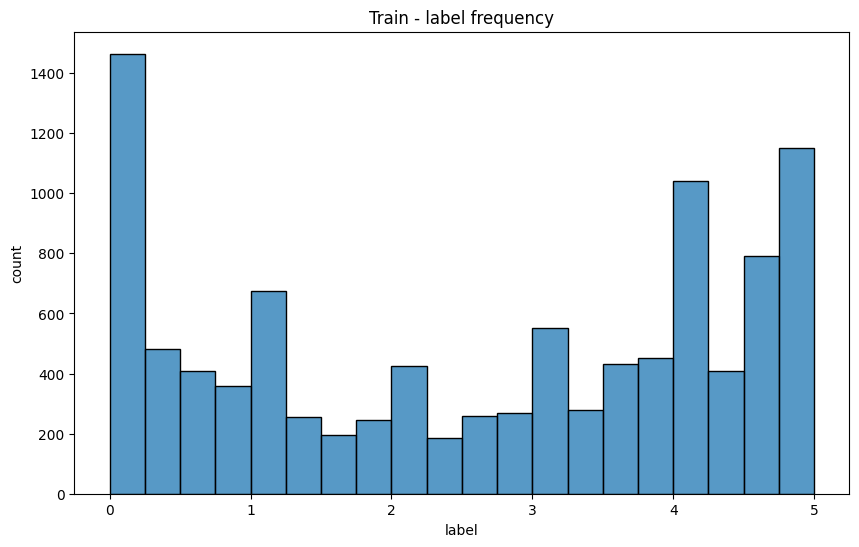


0.5 단위로 구간화한 레이블 분포 (0 포함):
label
[0.0, 0.5)    1981
[0.5, 1.0)    1072
[1.0, 1.5)     608
[1.5, 2.0)     654
[2.0, 2.5)     399
[2.5, 3.0)     785
[3.0, 3.5)     580
[3.5, 4.0)    1368
[4.0, 4.5)    1344
[4.5, 5.0)    1531
Name: count, dtype: int64


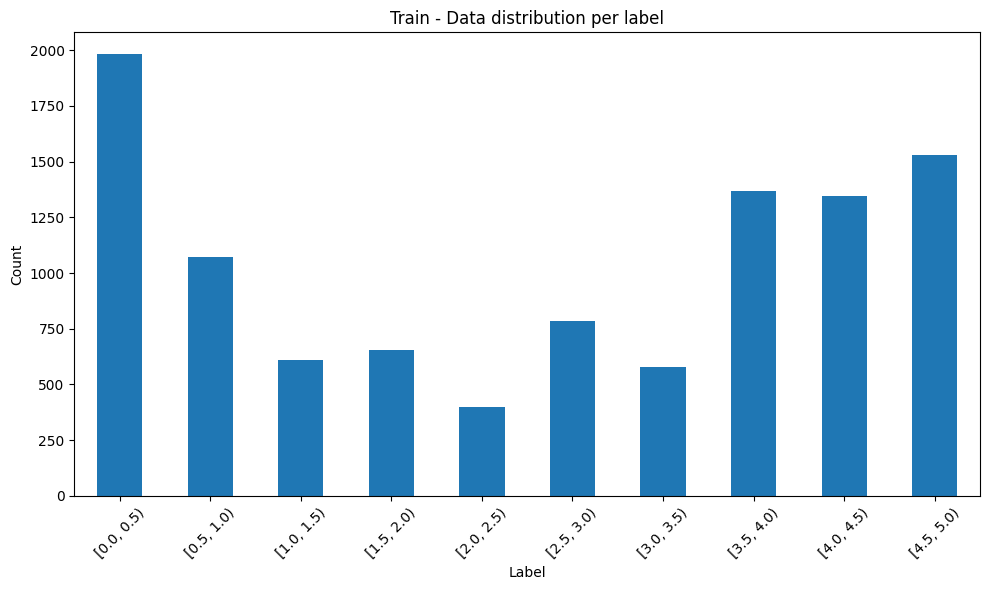


레이블 통계:
count    10322.000000
mean         2.581932
std          1.744110
min          0.000000
25%          0.800000
50%          2.800000
75%          4.200000
max          5.000000
Name: label, dtype: float64

이진 레이블 분포:
binary-label
1.0    5630
0.0    4692
Name: count, dtype: int64


In [87]:
EDA(dataset, "Train")

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5]


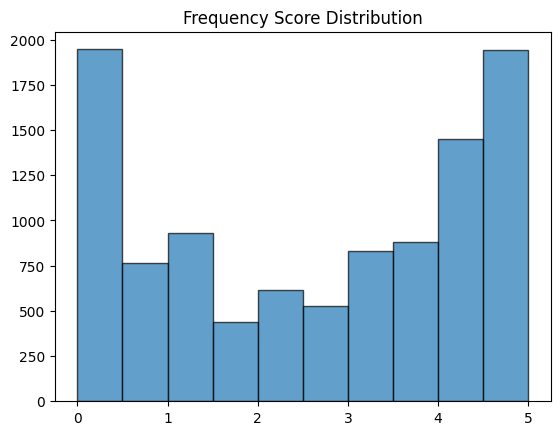

In [89]:
import numpy as np
import matplotlib.pyplot as plt


frequencies = list(dataset['label'].values)

# 히스토그램으로 빈도수 분포를 시각화 (bin 설정 가능)
bins = np.arange(1, max(frequencies) + 2, 0.5) - 1  # 빈도를 기준으로 bin을 설정
print(bins)
plt.hist(frequencies, bins=bins[:-1], edgecolor='black', alpha=0.7)

# 그래프 제목 및 축 라벨 설정
plt.title('Frequency Score Distribution')


# 그래프 표시
# plt.xticks(np.arange(1, max(frequencies) + 1))  # 빈도수에 맞게 x축 눈금 설정
plt.show()

## Swap Data 합치기